## Linear Regression
### Name: Rebecah Kwak
### Class: vol3
### Section: Bryce Section
### Date: Week 9

In [1]:
import numpy as np
import pandas as pd
import time
import statsmodels.api as sm
from sklearn import linear_model
from itertools import combinations
from matplotlib import pyplot as plt
import time

import pandas as pd
import statsmodels.api as sm
import numpy as np
from sklearn import linear_model as lm
import itertools
from sklearn.model_selection import cross_val_score as CV


## Problem 1
Write a function that takes as input $X$ and **y** as defined on page 1. Call this function **ols**. This function should return the least squares estimator for $\beta$ as a numpy array.

In [2]:
def ols(X, y):
    """
    Solves for the least squares estimator.
    Add a column of 1s to X.
    Parameters:
        X: n x d numpyarray
        y: n x 1 numpyarray
    Returns:
        beta: d x 1 numpyarray
    """
    #adding a column of ones to X to account for B0
    x0 = np.ones(np.shape(X)[0])
    Xnew = np.column_stack((X,x0))

    #putting values to make B
    B = np.linalg.inv(Xnew.T@Xnew)@Xnew.T@y
    
    return B


## Problem 2
Find the least squares estimator for $\beta$ using this random data. 
Produce a plot showing the random data and the line of best fit determined by the least squares estimator for $\beta$. 
Your plot should include a title, axis labels, and a legend. 

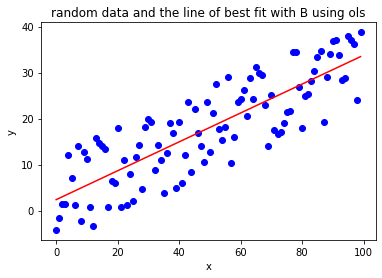

In [3]:
n = 100 # Number of points to generate
X = np.arange(100) # The input X for the function ols
eps = np.random.uniform(-10,10, size=(100,)) # Noise to generate random y ← coordinates
y = .3*X + 3 + eps # The input y for the function ols

#getting the slope and the y-intercept
a, b = ols(X,y)

#plotting
plt.plot(X, X*a+b,color = 'red')
plt.scatter(X,y, color = 'blue')
plt.xlabel("x")
plt.ylabel("y")
plt.title("random data and the line of best fit with B using ols")
plt.show()

## Problem 3
Write a function that finds the least squares estimator for rank-deficient models using the SVD. 
The function should still take $X$ and **y** as inputs. Call the function **svd_ols** and return the least squares estimator for $\beta$ as a numpy array.

In [4]:
def svd_ols(X, y):
    """
    Solves for the least squares estimator using the SVD.
    Add a column of 1s to X.
    Parameters:
        X: n x d numpyarray
        y: n x 1 numpyarray
    Returns:
        beta: d x 1 numpy array
    """
    #adding a column of ones to X to account for B0
    x0 = [1]*np.shape(X)[0]
    Xnew = np.column_stack((x0,X))

    U,s,V_T = np.linalg.svd(Xnew,full_matrices = False)
    #putting values to make B
    B = V_T.T@np.diag(1/s)@U.T@y

    return B

## Problem 4
Use your function **svd_ols** to find the least squares estimator for a cubic polynomial. 
Create a plot that shows a scatter plot of the data and a curve using the least squares estimator. 
Your plot should include a title, axis labels, and a legend.

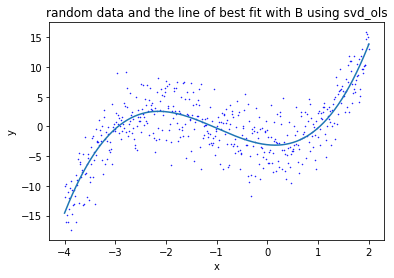

In [5]:
x = np.linspace(-4, 2, 500)
y = x**3 + 3*x**2 - x - 3.5
eps = np.random.normal(0, 3, len(y)) # Create noise
y += eps # Add noise to randomize data

#getting the slope and the y-intercept
X = np.vander(x, 4, increasing = True)
T = svd_ols(X[:,1:],y)

#plotting
plt.scatter(x,y, color = 'blue',s=.25)
plt.plot(x, X@T)
plt.xlabel("x")
plt.ylabel("y")
plt.title("random data and the line of best fit with B using svd_ols")
plt.show()

## Problem 5
The file **realestate.csv** contains transaction data from 2012-2013. 
It has columns for transaction data, house age, distance to nearest MRT station, number of convenience stores, latitude, longitude, and house price of unit area.
Each row in the array is a separate measurement.

Find the combination of variables that builds the model with the best $R^2$ value when predicting **house price of unit area**. Use statsmodels to build each model and calculate $R^2$. Use **statsmodels** to build each model and calculate $R^2$. Using the same combination of variables, time the methods **ols**, **svd_ols**, and **statsmodels** . Return a list with the first element being a tuple of times for each method and the second element being the best $R^2$ value from the first part of the problem.

In [6]:
def problem5():
    """
    Find the best R2 value using statsmodels.
    Then time ols, svd_ols, and statsmodlels.
    Returns:
        list(): a tuple of times and the best R2 value
    """
    data = pd.read_csv("realestate.csv") # Read in data as pandas dataframe
    y = data["Y house price of unit area"] # Extract dependent variable
    titles = ["X1 transaction date", "X2 house age", "X3 distance to the nearest MRT station", "X4 number of convenience stores", "X5 latitude", "X6 longitude"]

    temp_X = data[titles] # Extract independent variables
    
    R_2 = 0
    for i in range(1,len(titles)+1):
        for comb in combinations(titles,i):
            model = sm.OLS(y,sm.add_constant(temp_X[list(comb)])).fit()
            #getting the largest number R_2 and combination
            if model.rsquared > R_2:
                R_2 = model.rsquared
                combb = comb
    
    X = temp_X[list(combb)] #need stats model
    
    a = time.time()
    #ols
    ols(np.array(X), y)
    b = time.time()
    #svd_ols
    svd_ols(np.array(X),y)
    c = time.time()
    #stats
    X = sm.add_constant(temp_X)
    sm.OLS(y,X).fit()
    d = time.time()

    return [(b-a,c-b,d-c),R_2]

In [7]:
problem5()

/Users/raul/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


[(0.00015687942504882812, 0.00020813941955566406, 0.0012888908386230469),
 0.5823704472722991]

## Problem 6
Use the file **realestate.csv** and the Python Example on page 4 as a template for constructing **y** and $X$ and calculating model AIC and BIC. 
For the dependent variable, use **house price of unit area**. 
For the independent variables, use **distance to the nearest MRT station**, **number of convenience stores**, **latitude**, and **longitude**.

Find the model that has the lowest AIC and the model that has the lowest BIC. Are they the same model? Print the features of the model with the lowest AIC as a list.

In [8]:
data = pd.read_csv("realestate.csv") # Read in data as pandas dataframe
y = data["Y house price of unit area"] # Extract dependent variable
titles = ["X3 distance to the nearest MRT station", "X4 number of convenience stores", "X5 latitude", "X6 longitude"]
temp_X = data[titles] # Extract independent variables

AIC = 100000
BIC = 100000

for i in range(1,len(titles)+1):
    for comb in combinations(titles,i):
        model = sm.OLS(y,sm.add_constant(temp_X[list(comb)])).fit()
        #getting the lowest number AIC
        if model.aic < AIC:
            AIC = model.aic
            combb_A = comb
        #getting the lowest number BIC
        if model.bic < BIC:
            BIC = model.bic
            combb_B = comb

print(AIC, list(combb_A))
print(BIC, list(combb_B))
print("They are the same!")

3038.536259321834 ['X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude']
3054.6397232171353 ['X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude']
They are the same!


## Problem 7
Use Ridge and Lasso Regression to model **house price of unit area** from the file **realestate.csv**.
Before fitting each model, run a GridSearch on $\alpha$ to find the optimal value.
Then use the optimal $\alpha$ to fit the model.
Once you have fit the model, you can use the **score** method to get $R^2$. 
Print $R^2$ for each model as a tuple. 
How do these models compare to the models in problem 6?

In [9]:
data = pd.read_csv("realestate.csv") # Read in data as pandas dataframe
y = data["Y house price of unit area"] # Extract dependent variable
titles = ["X1 transaction date", "X2 house age", "X3 distance to the nearest MRT station", "X4 number of convenience stores", "X5 latitude", "X6 longitude"]

temp_X = data[titles] # Extract independent variables

cv_R = lm.RidgeCV(alphas=np.logspace(-6, 6, 13)).fit(temp_X,y) # Range for grid search
print(cv_R.score(temp_X,y))

cv_L= lm.LassoCV(alphas=np.logspace(-6, 6, 13)).fit(temp_X,y) # Range for grid search
print(cv_L.score(temp_X,y))

print("These model spits out pretty much same as quesiton6")

0.5823546190054181
0.5822617746793027
These model spits out pretty much same as quesiton6


In [58]:
from sklearn import tree, model_selection
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier


In [59]:
def show_digit(digit,title):
    plt.matshow(digit.reshape((8,8)), cmap='binary')
    plt.title(title)
    plt.show()

In [60]:
digits = datasets.load_digits()
data = digits.data
target = digits.target

NameError: name 'datasets' is not defined

In [61]:
#(i)

In [62]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(data,
                                                                    target,
                                                                    train_size=.8, 
                                                                    shuffle=True)

NameError: name 'target' is not defined

In [ ]:
#(ii)
para = {
    'max_depth': np.arange(1,10,2),
    'min_samples_leaf': [2,3],
    'max_leaf_nodes': [2,3],
}
tree = tree.DecisionTreeClassifier()
gs = model_selection.GridSearchCV(tree,param_grid,scoring='f1')
gs.fit(X,y)

opt = gs.best_estimator_
with open('tree_graph_opt.txt', 'w') as f:
    f.write(tree.export_graphviz(opt))
